In [4]:
from google.colab import files
uploaded = files.upload()

Saving links.csv to links (1).csv
Saving movies.csv to movies (1).csv
Saving ratings.csv to ratings (1).csv
Saving tags.csv to tags (1).csv


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 
sns.set(color_codes=True)

import io

df_m = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
df_l = pd.read_csv(io.BytesIO(uploaded['links.csv']))
df_r = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))
df_t = pd.read_csv(io.BytesIO(uploaded['tags.csv']))

In [75]:
id_to_title = dict()
for index, x in df_m.iterrows():
  id_to_title[x['movieId']] = x['title']

title_to_id = dict()
for index, x in df_m.iterrows():
  title_to_id[x['title']] = x['movieId']

id_to_genre = dict()
for index, x in df_m.iterrows():
  id_to_genre[x['movieId']] = x['genres']

In [76]:
df_m

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [77]:
df_l

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [78]:
df_r

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [79]:
df_t

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


# Question 1

### Counting of NaN values per column

In [80]:
print('\n- movies.csv -')
print(df_m.isnull().sum(axis=0))
print('\n- ratings.csv -')
print(df_r.isnull().sum(axis=0))
print('\n- tags.csv -')
print(df_t.isnull().sum(axis=0))
print('\n- links.csv -')
print(df_l.isnull().sum(axis=0))


- movies.csv -
movieId    0
title      0
genres     0
dtype: int64

- ratings.csv -
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

- tags.csv -
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

- links.csv -
movieId    0
imdbId     0
tmdbId     8
dtype: int64


### Details of each dataset

In [81]:
print('\n- movies.csv -')
df_m.info()
print('\n- ratings.csv -')
df_r.info()
print('\n- tags.csv -')
df_t.info()
print('\n- links.csv -')
df_l.info()


- movies.csv -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

- ratings.csv -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

- tags.csv -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683

### Plotting correlation matrix


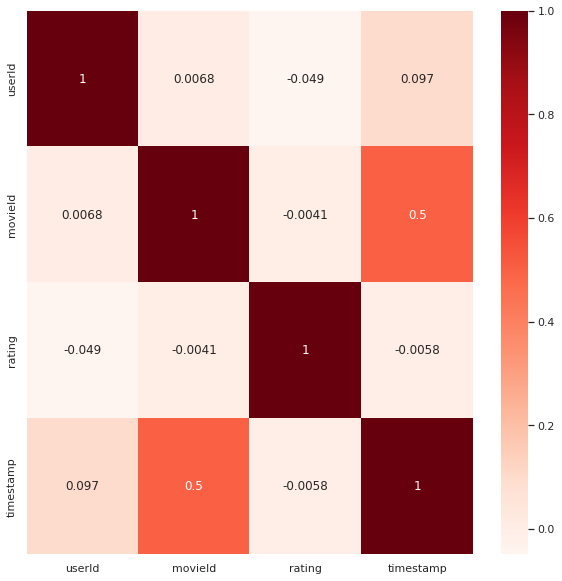

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(df_r.corr(), cbar=True, annot=True, cmap='Reds')

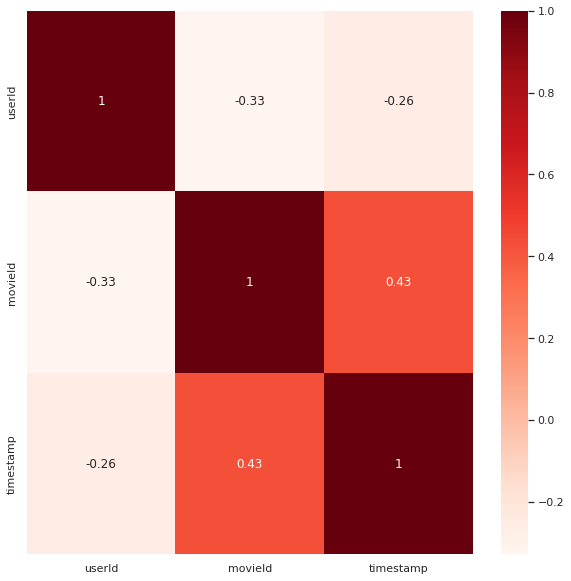

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(df_t.corr(), cbar=True, annot=True, cmap='Reds')

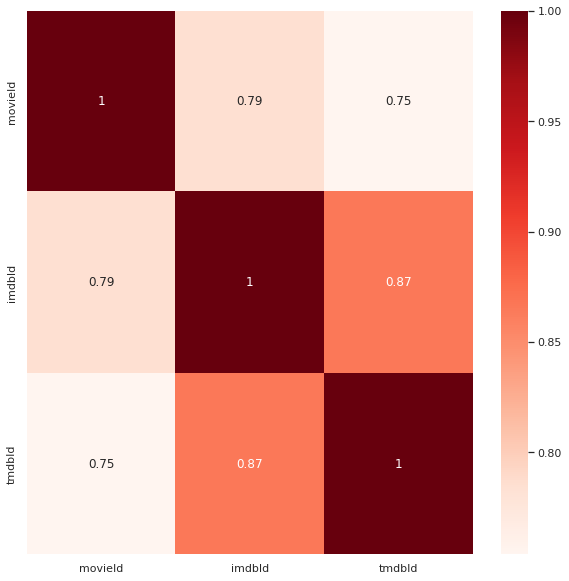

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df_l.corr(), cbar=True, annot=True, cmap='Reds')

### Frequency distribution of ratings 

In [85]:
rating_dist = df_r['rating'].value_counts()
rating_dist

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

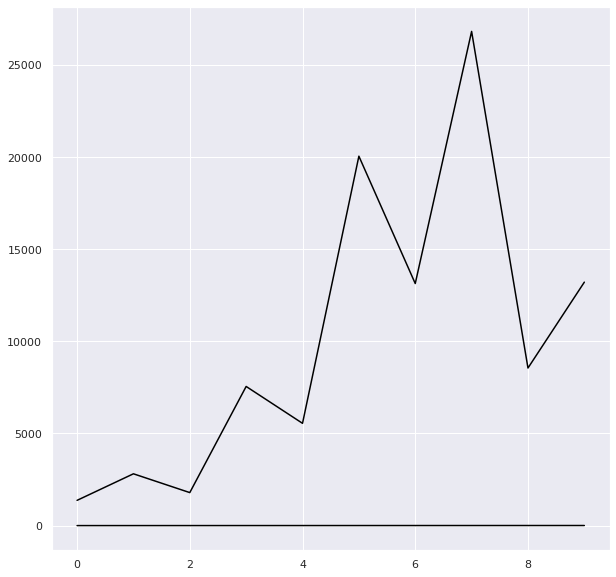

In [86]:
rating_val = [(0.5, 1370), (1.0, 2811), (1.5, 1791), (2.0, 7551), (2.5, 5550), (3.0, 20047), (3.5, 13136), (4.0, 26818), (4.5, 8551), (5.0, 13211)]
plt.figure(figsize=(10, 10)) 
plt.plot(rating_val, 'black')

### Frequency distribution of tags

In [87]:
print(df_t['tag'].value_counts())

In Netflix queue     131
atmospheric           36
superhero             24
thought-provoking     24
Disney                23
                    ... 
rabbi                  1
tedious                1
awkward                1
masculinity            1
MMA                    1
Name: tag, Length: 1589, dtype: int64


### Distribution of movies by genres

In [88]:
freq_temp = dict()
for index, row in df_m.iterrows():
    curr = row['genres'].split('|')
    for vals in curr:
      if vals not in freq_temp:
        freq_temp[vals] = 1
      else:
        freq_temp[vals] += 1

for genre, cnt in freq_temp.items():
  print(genre, cnt)

Adventure 1263
Animation 611
Children 664
Comedy 3756
Fantasy 779
Romance 1596
Drama 4361
Action 1828
Crime 1199
Thriller 1894
Horror 978
Mystery 573
Sci-Fi 980
War 382
Musical 334
Documentary 440
IMAX 158
Western 167
Film-Noir 87
(no genres listed) 34


### Average rating of movie given by users

In [89]:
trend = df_r.groupby('movieId')
trend = trend['rating'].mean()
trend = trend.reset_index()
trend = trend.sort_values('rating', ascending=False)
trend

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
...,...,...
9253,157172,0.5
7536,85334,0.5
6486,53453,0.5
5200,8494,0.5


# Question 2

In [ ]:
df_r.drop(columns=['timestamp'],inplace=True)

merge_list = df_r.groupby(by = ["userId"])["movieId"].apply(list).reset_index()
merge_list = merge_list['movieId'].tolist()

In [91]:
pd.get_dummies
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
data = pd.DataFrame(te_ary, columns=te.columns_)
#data

In [ ]:
!pip install mlxtend --upgrade

### Performing fpgrowth

In [93]:
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(data, min_support=0.1, use_colnames=True)
fpgrowth_frequent_itemsets.head()
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


4     38160
5     33837
3     21556
6     16419
2      5061
7      4365
8       607
1       328
9        35
10        1
Name: itemsets, dtype: int64

In [94]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

,support,itemsets,length
0,0.539344,(356),1
1,0.503279,(296),1
2,0.457377,(593),1
3,0.455738,(2571),1
4,0.411475,(260),1
...,...,...,...
120364,0.101639,"(1393, 780)",2
120365,0.106557,"(1393, 260)",2
120366,0.104918,"(593, 1393)",2
120367,0.114754,"(1393, 356)",2


In [95]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] > 2)]

,support,itemsets,length
330,0.293443,"(296, 356, 318)",3
334,0.268852,"(296, 593, 356)",3
335,0.254098,"(593, 356, 318)",3
336,0.221311,"(296, 593, 356, 318)",4
337,0.270492,"(296, 593, 318)",3
...,...,...,...
120352,0.108197,"(1210, 1387, 1196)",3
120353,0.106557,"(1210, 1196, 1387, 260)",4
120354,0.100000,"(480, 1387, 260)",3
120362,0.103279,"(8874, 2571, 2959)",3


### Forming association Rules

In [96]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=0.1)

In [97]:
rules = rules.sort_values('lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3316685,"(2571, 1196, 7438)","(1210, 6874, 2959)",0.111475,0.108197,0.100000,0.897059,8.290998,0.087939,8.663232
3316704,"(1210, 6874, 2959)","(2571, 1196, 7438)",0.108197,0.111475,0.100000,0.924242,8.290998,0.087939,11.728525
3316591,"(1196, 7438)","(6874, 1210, 2959)",0.114754,0.108197,0.100000,0.871429,8.054113,0.087584,6.936248
3316679,"(1210, 6874, 2571, 2959)","(1196, 7438)",0.108197,0.114754,0.100000,0.924242,8.054113,0.087584,11.685246
3316582,"(6874, 1210, 2959)","(1196, 7438)",0.108197,0.114754,0.100000,0.924242,8.054113,0.087584,11.685246
...,...,...,...,...,...,...,...,...,...
2448244,(4993),(150),0.324590,0.329508,0.104918,0.323232,0.980954,-0.002037,0.990727
474655,(2959),(592),0.357377,0.309836,0.108197,0.302752,0.977137,-0.002532,0.989840
474654,(592),(2959),0.309836,0.357377,0.108197,0.349206,0.977137,-0.002532,0.987445
1044807,(590),(2571),0.268852,0.455738,0.113115,0.420732,0.923188,-0.009411,0.939569


### Merging average rating column with movies dataframe

In [98]:
df_inner = pd.merge(df_m, trend, on='movieId', how='inner')
df_inner = df_inner.sort_values('rating', ascending=False)
df_inner

,movieId,title,genres,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8089,100556,"Act of Killing, The (2012)",Documentary,5.0
9065,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9076,143511,Human (2015),Documentary,5.0
9078,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
9253,157172,Wizards of the Lost Kingdom II (1989),Action|Fantasy,0.5
7536,85334,Hard Ticket to Hawaii (1987),Action|Comedy,0.5
6486,53453,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi,0.5
5200,8494,"Cincinnati Kid, The (1965)",Drama,0.5


### Function to recommend the movies

In [112]:
def solve(input):
  sett = set()
  
  for index, x in rules.iterrows():
    if(x['antecedents'] == input):
      for y in x['consequents']:
        if(len(sett) == 4):
            return sett
        sett.add(y)
        if(len(sett) == 4):
          return sett

    if(len(input) == 1):
      for x in input:
        str = id_to_genre[x]
        cnt = 0
        for ch in str:
          if ch == '|':
            cnt += 1
        if cnt > 3:
          for index, curr in df_inner.iterrows():
              if curr['movieId'] != x and curr['genres'] == str:
                if(len(sett) == 4):
                  return sett
                sett.add(curr['movieId'])
                if(len(sett) == 4):
                  return sett


  for index, x in rules.iterrows():
    if(x['antecedents'] < input):
      for y in x['consequents']:
        if(len(sett) == 4):
          return sett
        sett.add(y)
        if(len(sett) == 4):
          return sett

  freq = dict()
  for x in input:
    for index, row in df_m.iterrows():
      if(row['movieId'] == x):
        curr = row['genres'].split('|')
        for vals in curr:
          if vals not in freq:
            freq[vals] = 1
          else:
            freq[vals] += 1
  
  freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
  
  for movie, cnt in freq:
    if(len(sett) == 4):
      return sett
    for index, x in df_inner.iterrows():
      if movie in x['genres']:
        if len(sett) == 4:
          return sett
        sett.add(x['movieId'])
        if len(sett) == 4:
          return sett

  for index, x in rules.iterrows():
    if(x['antecedents'] > input):
      for y in x['consequents']:
        if(len(sett) == 4):
          return sett
        sett.add(y)
        if(len(sett) == 4):
          return sett

  return sett


# **NOTE**


*   Performed recommendations on hard-coded values
*   Will work 



In [113]:

arr = list()
arr.append(frozenset({1}))
arr.append(frozenset({5, 720, 1196}))
arr.append(frozenset({1, 1210}))

import csv
with open('output.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["movies", "recommendation"])
  for input in arr:
    print('The given input is:\n')
    input_str = ""
    for x in input:
      input_str += str(id_to_title[x]) + ', '
      print(id_to_title[x])

    output = solve(input)

    print('\nThe recommended movies are:\n')
    final_str = ""
    for x in output:
      final_str += id_to_title[x] + ', '
      print(id_to_title[x])
    
    writer.writerow([input_str, final_str])

    print('\n\n')

The given input is:

Toy Story (1995)

The recommended movies are:

Emperor's New Groove, The (2000)
Toy Story 2 (1999)
Asterix and the Vikings (Astérix et les Vikings) (2006)
Monsters, Inc. (2001)



The given input is:

Wallace & Gromit: The Best of Aardman Animation (1996)
Star Wars: Episode V - The Empire Strikes Back (1980)
Father of the Bride Part II (1995)

The recommended movies are:

Jurassic Park (1993)
Toy Story (1995)
Independence Day (a.k.a. ID4) (1996)
Terminator, The (1984)



The given input is:

Toy Story (1995)
Star Wars: Episode VI - Return of the Jedi (1983)

The recommended movies are:

Jurassic Park (1993)
Pulp Fiction (1994)
Indiana Jones and the Last Crusade (1989)
Star Wars: Episode V - The Empire Strikes Back (1980)





In [101]:
from mlxtend.frequent_patterns import fpmax
max_freq_itset=fpmax(data, min_support=0.1, use_colnames=True)

max_freq_itset

,support,itemsets
0,0.100000,(3527)
1,0.100000,(51255)
2,0.100000,(30793)
3,0.100000,(2321)
4,0.100000,(3253)
...,...,...
32764,0.109836,"(356, 296, 2571, 110, 593, 318)"
32765,0.100000,"(480, 356, 260, 2571, 593, 318)"
32766,0.103279,"(480, 356, 296, 2571, 593, 318)"
32767,0.104918,"(480, 260, 296, 2571, 593, 318)"


In [104]:
max_freq_itset = max_freq_itset.sort_values('itemsets')
import graphviz
from graphviz import Digraph, Graph

g = Graph('parent')

count=0
maxlength=0
for x in max_freq_itset['itemsets']:
  maxlength=max(maxlength, len(x))

lis=[None]*maxlength
count0=[0]*maxlength
first=[-1]*maxlength

for i in range(maxlength):
  lis[i]=Graph()
  lis[i].attr(rank='same')

for x in max_freq_itset['itemsets']:
  if(count0[len(x)-1]<10):
    lis[len(x)-1].node(str(count), str(x))
    if(count0[len(x)-1]==0):
      first[len(x)-1]=count
    count0[len(x)-1]=count0[len(x)-1]+1
  count=count+1

abc=0
prev=first[0]
while(prev==-1):
  abc=abc+1

for i in range(1, maxlength-1):
  if not first[i]==-1: 
    g.edge(str(prev),str(first[i]),style='invis')
    prev=first[i]

for i in range(maxlength-1):
  g.subgraph(lis[i])

print(g.source)

g.render(filename='g1.dot')

graph parent {
	0 -- 1270 [style=invis]
	1270 -- 127 [style=invis]
	127 -- 2 [style=invis]
	2 -- 4 [style=invis]
	4 -- 1 [style=invis]
	1 -- 6 [style=invis]
	6 -- 159 [style=invis]
	159 -- 3437 [style=invis]
	{
		rank=same
		0 [label="frozenset({3527})"]
		21763 [label="frozenset({50872})"]
		21764 [label="frozenset({1201})"]
		21772 [label="frozenset({1079})"]
		21780 [label="frozenset({1407})"]
		21781 [label="frozenset({11})"]
		21782 [label="frozenset({3408})"]
		21784 [label="frozenset({4034})"]
		21786 [label="frozenset({89745})"]
		21787 [label="frozenset({520})"]
	}
	{
		rank=same
		1270 [label="frozenset({590, 1198})"]
		1271 [label="frozenset({590, 1270})"]
		2679 [label="frozenset({377, 7153})"]
		2680 [label="frozenset({5952, 377})"]
		3480 [label="frozenset({3578, 150})"]
		4503 [label="frozenset({588, 1214})"]
		4504 [label="frozenset({6539, 1214})"]
		4702 [label="frozenset({1210, 595})"]
		4715 [label="frozenset({2571, 595})"]
		4716 [label="frozenset({595, 527})"]
	}
	

'g1.dot.pdf'